<a href="https://www.kaggle.com/code/fiftythirtyfour/usa-airline-on-time-performance?scriptVersionId=185119924" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📜Summary
**Introduction:** Efficient operations in the airline industry hinge on maximizing the number of flights to optimize revenue. However, maintaining a tight schedule poses a significant risk of network delays. A single delayed flight not only impacts its immediate successor but can ripple through subsequent flights, amplifying disruptions across the network. This is why Airlines does it best to improve their On-Time Performance.

**Problem:** How can we maximize the number of flights while mitigating the risk of disruption?

**Hypothesis:** If we are able to know the chances of a flight being delayed, we  can plan our flight schedules better.

**Goal:** Predict the probability of delays for flights.

[kaggle](https://www.kaggle.com/code/fiftythirtyfour/usa-airline-delays-in-2015/edit)

# 🤓Data Science

In [1]:
! pip install airportsdata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.0/911.0 kB 17.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as dt
import airportsdata as ap

warnings.filterwarnings("ignore")
pd.options.display.max_columns = 200
pd.options.display.max_rows = 400

In [3]:
## Load
df = pd.read_csv('/kaggle/input/flight-delays/flights.csv')
df.columns = df.columns.str.lower()

rairline = pd.read_csv('/kaggle/input/flight-delays/airlines.csv')


In [4]:
pd.read_csv('/kaggle/input/flight-delays/airports.csv')

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [5]:
df['origin_airport'].value_counts()

origin_airport
ATL      346836
ORD      285884
DFW      239551
DEN      196055
LAX      194673
          ...  
11503         1
14222         1
13964         1
13459         1
12265         1
Name: count, Length: 930, dtype: int64

In [6]:
! pip install TimezoneFinder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.4 MB/s eta 0:00:00


In [7]:
from timezonefinder import TimezoneFinder

# Create an instance of TimezoneFinder
tf = TimezoneFinder()

# Latitude and Longitude coordinates
latitude = 30.48325
longitude = -86.52540

# Get the timezone
timezone = tf.timezone_at(lat=latitude, lng=longitude)

print("The timezone is:", timezone)

The timezone is: America/Chicago


In [8]:
df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
airports = pd.DataFrame(ap.load()).T
airports = airports.loc[airports['iata'] != '']
df['tz'] = df['origin_airport'].map(airports.set_index('iata')['tz'])

## Cleaning
df['scheduled_departure'] = [dt.time(x // 100, x % 100) for x in df['scheduled_departure']]
# df['scheduled_arrival'] = [dt.time(x // 100, x % 100) for x in df['scheduled_arrival']]
df['std_date'] = pd.to_datetime(df[['year', 'month', 'day']])

df['std_date_time'] = pd.to_datetime(df['std_date'].astype(str) + ' ' + df['scheduled_departure'].astype(str))
df['sta_date_time'] = df['std_date_time'] + pd.to_timedelta(df['scheduled_time'], unit='m')
df['atd_date_time'] = df['std_date_time'] + pd.to_timedelta(df['departure_delay'], unit='m')
df['ata_date_time'] = df['atd_date_time'] + pd.to_timedelta(df['elapsed_time'], unit='m')

df['anchor'] = df['airline'] + [str(x).zfill(5) for x in df['flight_number']] + '|' + df['std_date'].dt.strftime('%Y-%m-%d') + '|' + df['origin_airport'].astype(str)
df['otp_dly15'] = np.where(df['departure_delay'] > 15, 0.0, 1.0)

## Organize
dly = [x for x in df.columns if 'delay' in x]
num = [x for x in df.columns if df.dtypes[x] in ('float', 'int64')]
cat = [x for x in df.columns if df.dtypes[x] == "object"]
target = 'departure_delay'
num.remove(target)

## Split
train = df.query('airline not in ("AA", "US", "OO")')
test = df.query('airline == "OO"')

# 🤓Data Science

In [10]:
train.corr(numeric_only=True)[target].sort_values(ascending=False)

departure_delay        1.000000
arrival_delay          0.944818
airline_delay          0.587769
late_aircraft_delay    0.559684
weather_delay          0.251968
departure_time         0.181721
wheels_off             0.171962
air_system_delay       0.128953
scheduled_arrival      0.107135
taxi_out               0.065530
wheels_on              0.057823
arrival_time           0.047801
cancelled              0.035646
elapsed_time           0.033674
scheduled_time         0.029432
distance               0.025458
diverted               0.025350
air_time               0.025053
taxi_in                0.023484
security_delay         0.011277
day                   -0.000214
flight_number         -0.006996
day_of_week           -0.014607
month                 -0.024249
otp_dly15             -0.659777
year                        NaN
Name: departure_delay, dtype: float64

# > Merger of American and US Airways
There was a Merger of American Airlines and US Airways in June 2015. Southwest, Delta and American Airlines have the biggest voume of flights in 2015.

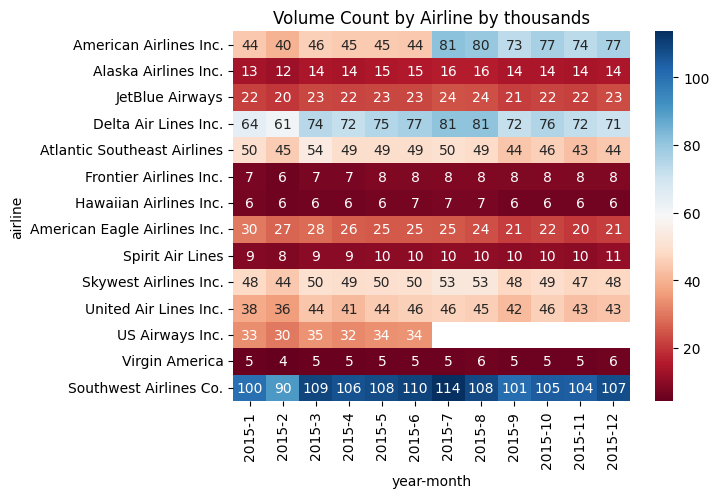

In [11]:
g = df.pivot_table('flight_number', index='airline'
              , columns=[df['year'], df['month']]
              , aggfunc='count') / 1000
g.index = g.index.map(rairline.set_index('IATA_CODE')['AIRLINE'])
sns.heatmap(g, cmap='RdBu', annot=True, fmt='.0f')

plt.title("Volume Count by Airline by thousands");

# > Airline Departure On-Time Performance.
Lower volume flights like Hawaiian, Virgin and Alaska Airlines are almost always on time. Delta and American airlines are also on time taking into consideration that they have more flights in 2015.

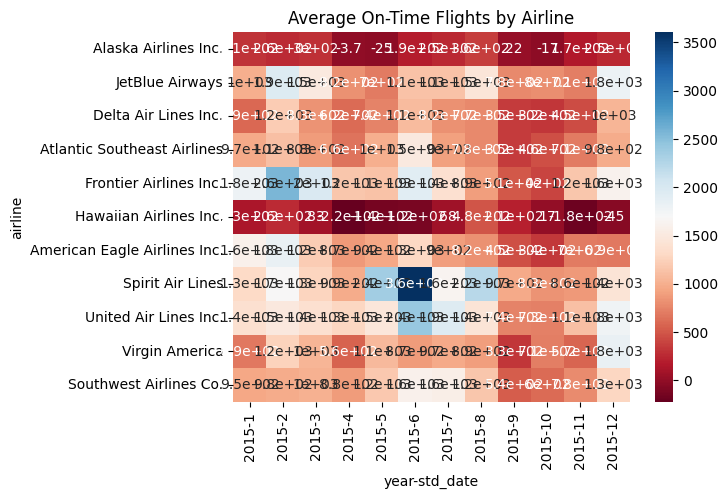

In [12]:
g = train.query('cancelled == 0 and diverted == 0')
g = g.pivot_table(target, index='airline'
             , columns=[g['year'], g['std_date'].dt.month]
             , aggfunc='mean')  * 100
g.index = g.index.map(rairline.set_index('IATA_CODE')['AIRLINE'])
sns.heatmap(g, annot=True, cmap='RdBu')
plt.title('Average On-Time Flights by Airline');

# > Flight Plan

In [13]:
vx = train.query('airline=="VX"')

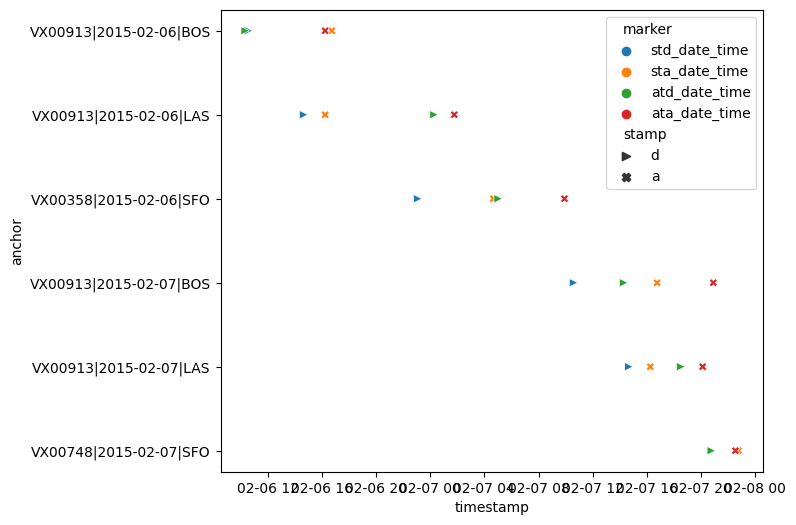

In [14]:
g = vx.query('tail_number == "N361VA"')
g = g.query('"2015-02-06" <= std_date <= "2015-02-07"')
g = g.loc[~g['departure_delay'].isnull()]
g = g[[
    'anchor'
    ,'std_date_time'
   , 'sta_date_time'    
   , 'atd_date_time'
   , 'ata_date_time'
#    , 'scheduled_time'
#        , 'elapsed_time'
#        , 'scheduled_arrival'
#        , 'arrival_time'
#        , 'arrival_delay'
#        , 'late_aircraft_delay'
#     , target
      ]]

g = g.sort_values(by='std_date_time')
# g['diff'] = (g['ata_date_time'] - g['sta_date_time']).dt.total_seconds() / 60
# g
g = pd.melt(g, id_vars='anchor', var_name='marker', value_name='timestamp')
g['stamp'] = g['marker'].str[2:3]
fig, ax = plt.subplots(figsize=(7,6))
sns.scatterplot (g, x='timestamp', y='anchor'
                 , hue='marker'
                 , style='stamp'
                 , markers={'d': '>', 'a': 'X'}
                 , ax=ax);

In [15]:
df['std_ls_date_time'] = df[['std_date_time', 'tz']].apply(lambda x: 
                                  x['std_date_time'].tz_localize(
                                      x['tz'], ambiguous='NaT')
                                  if pd.notna(x['std_date_time']) 
                                  and pd.notna(x['tz']) else pd.NaT, axis=1)

In [16]:
df['std_ls_date_time']

0          2015-01-01 00:05:00-09:00
1          2015-01-01 00:10:00-08:00
2          2015-01-01 00:20:00-08:00
3          2015-01-01 00:20:00-08:00
4          2015-01-01 00:25:00-08:00
                     ...            
5819074    2015-12-31 23:59:00-08:00
5819075    2015-12-31 23:59:00-05:00
5819076    2015-12-31 23:59:00-05:00
5819077    2015-12-31 23:59:00-05:00
5819078    2015-12-31 23:59:00-05:00
Name: std_ls_date_time, Length: 5819079, dtype: object

In [17]:
g = df.loc[df['tz'].isnull() & (df['origin_airport'].str.len() != 3)]
g['origin_airport'].value_counts()
g.groupby(['origin_airport', 'destination_airport' , 'airline', 'flight_number'])['anchor'].count()

origin_airport  destination_airport  airline  flight_number
10135           10397                DL       1076              4
                                              2561             25
                                     EV       5033             25
                                              5066              4
                                              5317             25
                                                               ..
16218           14107                OO       2961              2
                                              2963              1
                                              2968              2
                                              2991              1
                                              2992              2
Name: anchor, Length: 48943, dtype: int64

In [18]:
df.dtypes

year                            int64
month                           int64
day                             int64
day_of_week                     int64
airline                        object
flight_number                   int64
tail_number                    object
origin_airport                 object
destination_airport            object
scheduled_departure            object
departure_time                float64
departure_delay               float64
taxi_out                      float64
wheels_off                    float64
scheduled_time                float64
elapsed_time                  float64
air_time                      float64
distance                        int64
wheels_on                     float64
taxi_in                       float64
scheduled_arrival               int64
arrival_time                  float64
arrival_delay                 float64
diverted                        int64
cancelled                       int64
cancellation_reason            object
air_system_d

In [19]:
df['origin_airport'] = df['origin_airport'].astype(str)
df['destination_airport'] = df['destination_airport'].astype(str)

In [20]:
g = df.loc[(df['airline'] == 'DL') & (df['flight_number'] == 1858)]
g = g.groupby([
    'scheduled_departure'
    , 'flight_number'
    , 'origin_airport'])['distance'].mean().sort_values().reset_index()
h = g.groupby('distance')['origin_airport'].nunique()
h = h[h>1].index
g = g.loc[g['distance'].isin(h)]
g.groupby(['distance'
           , g['origin_airport'].str.len() > 3
           , 'origin_airport'
           
          ])['scheduled_departure'].min()

distance  origin_airport  origin_airport
813.0     False           ATL               09:40:00
                          AUS               10:45:00
          True            10397             09:40:00
                          10423             11:50:00
Name: scheduled_departure, dtype: object

In [21]:
g = df.loc[(df['airline'] == 'DL') 
           & (df['origin_airport'].str.len() > 3)]
# g = g[['origin_airport', 'destination_airport', 'flight_number']]
g.groupby(['flight_number'])['anchor'].count().sort_values()

flight_number
718      1
2318     1
1430     1
2476     1
441      1
        ..
1863    62
1864    62
1127    62
2236    62
881     62
Name: anchor, Length: 2199, dtype: int64